In [ ]:
!unzip '/content/archive (13).zip'

Archive:  /content/archive (13).zip
  inflating: phones_data.csv         


In [ ]:
print("importing required libraries")
import pandas as pd
import numpy as np
import ast
import time
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

importing required libraries


In [ ]:
df_data=pd.read_csv('/content/phones_data.csv')

In [ ]:
# omit_df=pd.read_csv('/content/omit.csv')

In [ ]:
df_data['customer_id']=df_data['Unnamed: 0']

In [ ]:
df_data.head(5)

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date,customer_id
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020,0
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020,1
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020,2
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020,3
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020,4


In [ ]:
df_data=df_data[['customer_id','brand_name','model_name','os']]

In [ ]:
df_data.head(5)

,customer_id,brand_name,model_name,os
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android
4,4,Nokia,1.3 1/16GB Charcoal,Android


In [ ]:
df_data=df_data.dropna()

In [ ]:
df_data.loc[df_data['os'].value_counts()[df_data['os']].values < 50, 'os'] = "other"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df_data.loc[df_data['model_name'].value_counts()[df_data['model_name']].values < 50, 'model_name'] = "other"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df_data.loc[df_data['brand_name'].value_counts()[df_data['brand_name']].values < 50, 'brand_name'] = "other"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df_data.isnull().sum()

customer_id    0
brand_name     0
model_name     0
os             0
dtype: int64

In [ ]:
df_data.shape

(1027, 4)

In [ ]:
# df_data=df_data[~df_data.customer_id.isin(list(omit_df['0']))]


([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

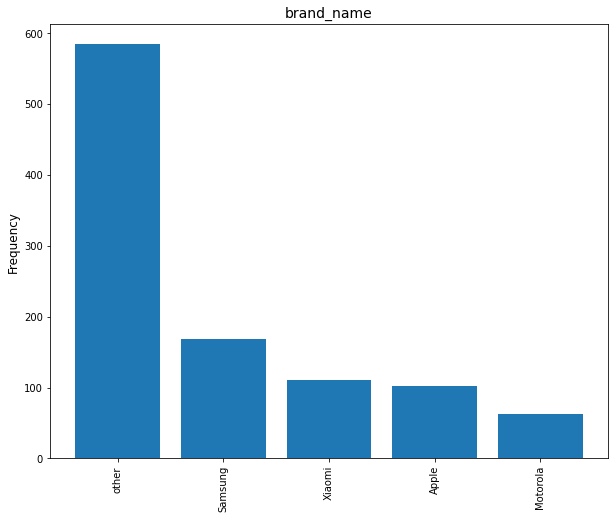

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(df_data['brand_name'].value_counts().index,
        df_data['brand_name'].value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title('brand_name', size = 14)
plt.xticks(rotation=90)

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

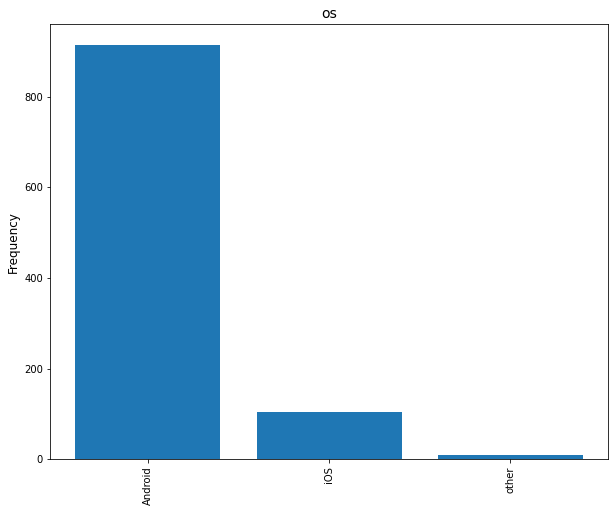

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(df_data['os'].value_counts().index,
        df_data['os'].value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title('os', size = 14)
plt.xticks(rotation=90)

In [ ]:
df_data.brand_name=df_data.brand_name.astype('category').cat.codes
df_data.model_name=df_data.model_name.astype('category').cat.codes
df_data.os=df_data.os.astype('category').cat.codes

In [ ]:
df_data.head(4)

,customer_id,brand_name,model_name,os
0,0,4,0,0
1,1,4,0,0
2,2,4,0,0
3,3,4,0,0


In [ ]:
from numpy import unique
from numpy import where
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()                                         
df_scaled = scaler.fit_transform(df_data)

In [ ]:
df_scaled

array([[-1.81025075,  0.74175898,  0.        , -0.33805741],
       [-1.80732599,  0.74175898,  0.        , -0.33805741],
       [-1.80440123,  0.74175898,  0.        , -0.33805741],
       ...,
       [ 1.75795256, -2.18537445,  0.        ,  2.53123981],
       [ 1.76087732,  0.74175898,  0.        , -0.33805741],
       [ 1.76380208,  0.74175898,  0.        , -0.33805741]])

In [ ]:
wcss_1 = []                                     
range_values = range(1, 10)                    
for i in range_values:                        
  kmeans = KMeans(n_clusters=i)                 
  kmeans.fit(df_scaled)            
  wcss_1.append(kmeans.inertia_)

In [ ]:
kmeans = KMeans(n_clusters=3)           
kmeans.fit(df_scaled)         
labels = kmeans.labels_

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_data.columns])
cluster_centers

,customer_id,brand_name,model_name,os
0,0.648372,0.570106,0.0,-0.338057
1,-0.828053,-0.028690,0.0,-0.332442
2,1.446347,-1.948039,0.0,2.763886


In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_data.columns])
cluster_centers

,customer_id,brand_name,model_name,os
0,840.624691,3.765432,0.0,1.249001e-16
1,335.821918,2.947162,0.0,1.956947e-03
2,1113.459459,0.324324,0.0,1.081081e+00


In [ ]:
df_mk_cluster = pd.concat([df_data, pd.DataFrame({'cluster': labels})], axis = 1) 
df_mk_cluster.head()

,customer_id,brand_name,model_name,os,cluster
0,0.0,4.0,0.0,0.0,1.0
1,1.0,4.0,0.0,0.0,1.0
2,2.0,4.0,0.0,0.0,1.0
3,3.0,4.0,0.0,0.0,1.0
4,4.0,4.0,0.0,0.0,1.0


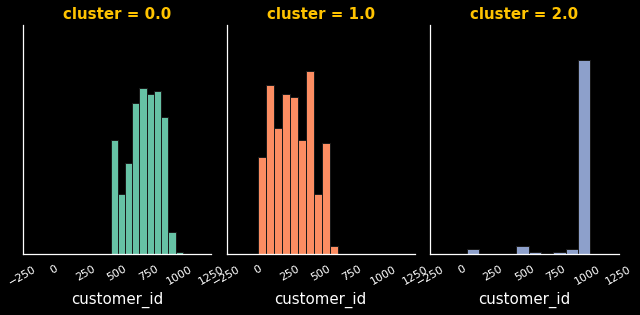

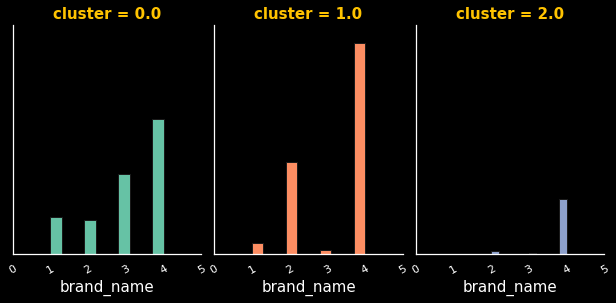

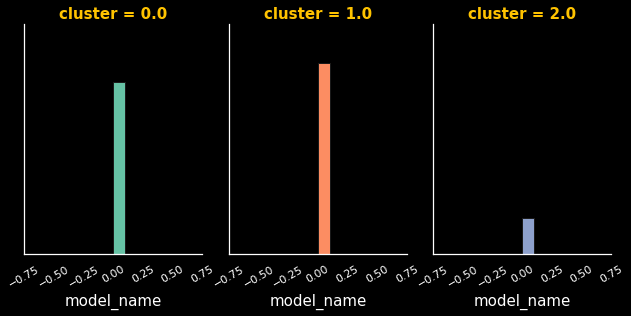

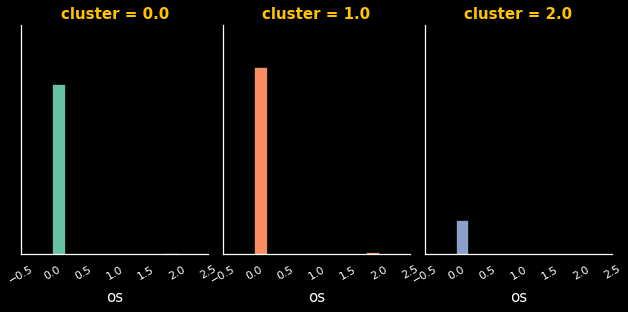

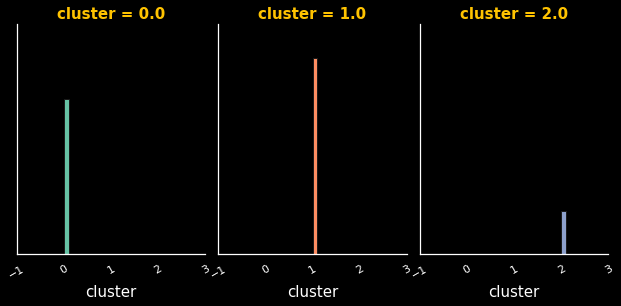

In [ ]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df_mk_cluster:
    g = sns.FacetGrid(df_mk_cluster, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5);

In [ ]:
df_mk_cluster['freq_count_mk'] = df_mk_cluster.groupby('cluster')['cluster'].transform('count')
df_mk_cluster['score_ranked_mk']=df_mk_cluster['freq_count_mk'].rank(ascending=0,method='dense')

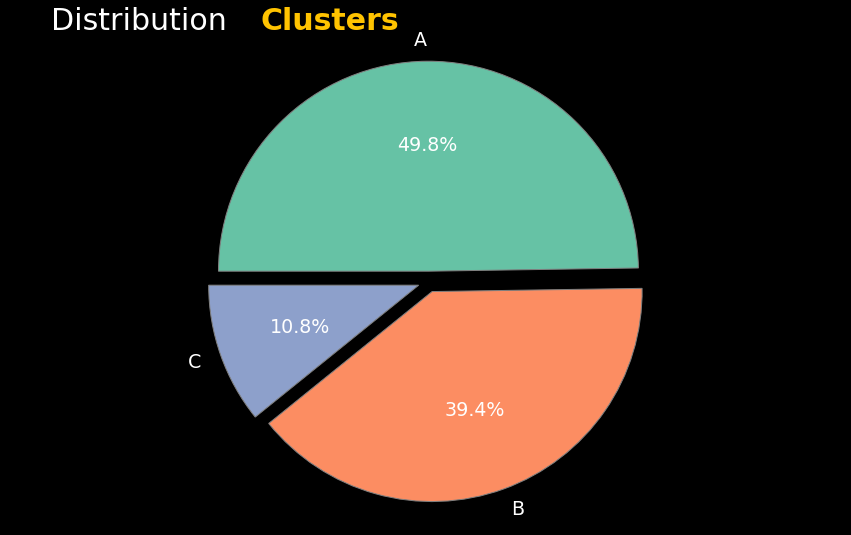

In [ ]:
clusters_count = df_mk_cluster['score_ranked_mk'].value_counts()                       
clusters_count = clusters_count.to_frame().reset_index()                      
clusters_count.columns = ['clusters', 'count']                               
clusters_count = clusters_count.sort_values('clusters', ascending = True)     

labels = [
        "A", 
        "B", 
        "C"
        ]

plt.figure(figsize=(15,9))
# mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:5]
plt.pie(clusters_count['count'], 
        explode=(0.05, 0.05, 0.05), 
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth':1}
        )

plt.axis('equal')
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-1.8, 1.2, "Distribution", size=30, color="white")
plt.show();

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage


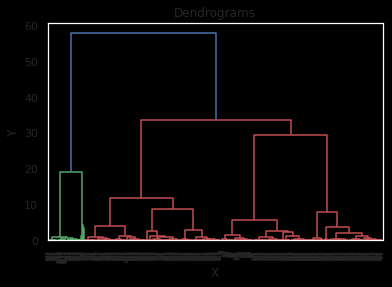

In [ ]:
dendrograma = dendrogram(linkage(df_scaled, method='ward'))
plt.title('Dendrograms')
plt.xlabel('X')
plt.ylabel('Y');

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hc_g = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'ward')
rotulos = hc_g.fit_predict(df_scaled)

In [ ]:

df_ag_cluster = pd.concat([df_data, pd.DataFrame({'cluster': rotulos})], axis = 1) 
df_ag_cluster.head()

,customer_id,brand_name,model_name,os,cluster
0,0.0,4.0,0.0,0.0,0.0
1,1.0,4.0,0.0,0.0,0.0
2,2.0,4.0,0.0,0.0,0.0
3,3.0,4.0,0.0,0.0,0.0
4,4.0,4.0,0.0,0.0,0.0


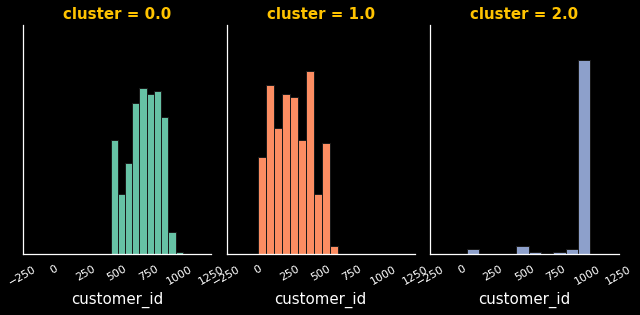

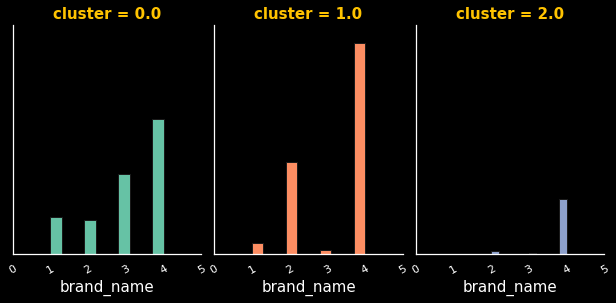

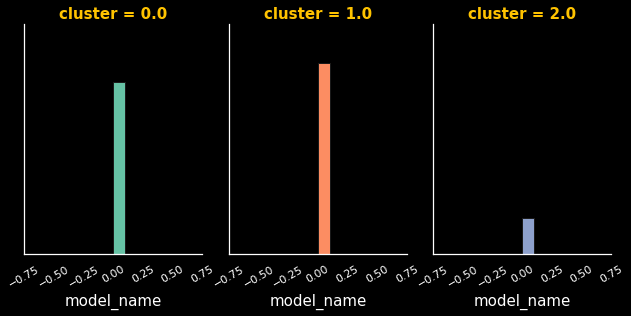

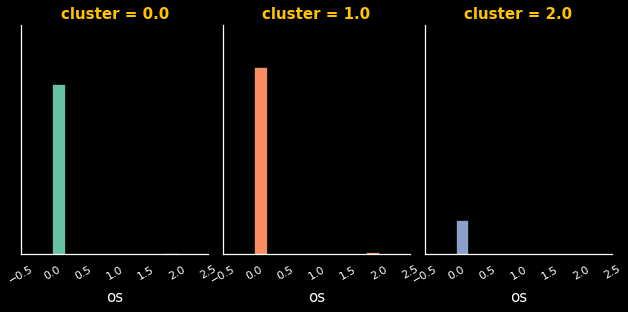

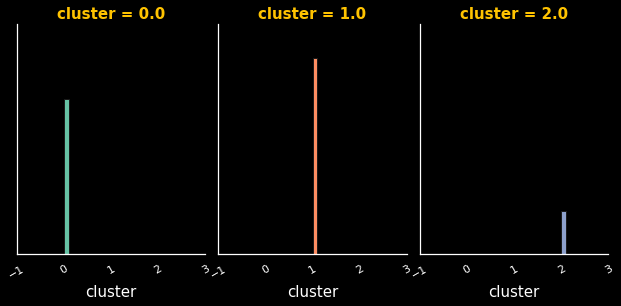

In [ ]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df_ag_cluster:
    g = sns.FacetGrid(df_mk_cluster, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5);

In [ ]:
df_ag_cluster['freq_count_ag'] = df_ag_cluster.groupby('cluster')['cluster'].transform('count')
df_ag_cluster['score_ranked_ag']=df_ag_cluster['freq_count_ag'].rank(ascending=0,method='dense')

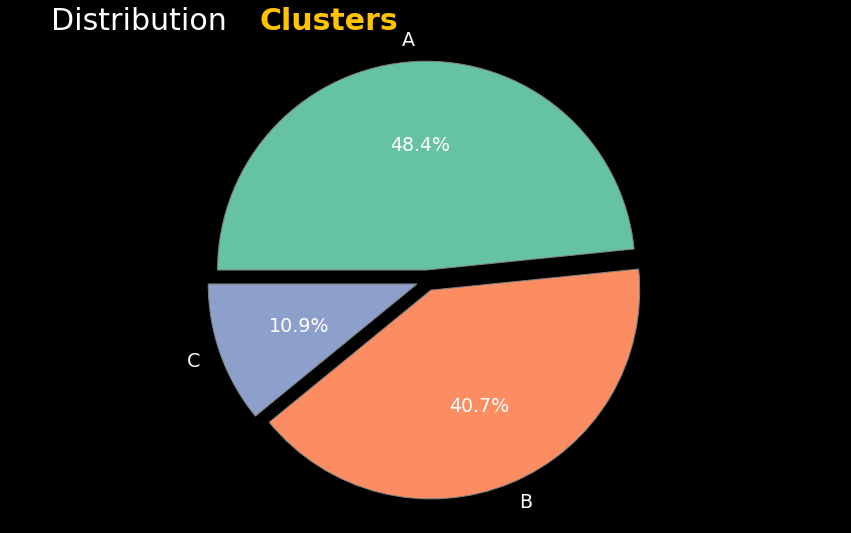

In [ ]:
clusters_count = df_ag_cluster['score_ranked_ag'].value_counts()                       
clusters_count = clusters_count.to_frame().reset_index()                      
clusters_count.columns = ['clusters', 'count']                               
clusters_count = clusters_count.sort_values('clusters', ascending = True)     

labels = [
        "A", 
        "B", 
        "C"
        ]

plt.figure(figsize=(15,9))
# mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:5]
plt.pie(clusters_count['count'], 
        explode=(0.05, 0.05, 0.05), 
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth':1}
        )

plt.axis('equal')
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-1.8, 1.2, "Distribution", size=30, color="white")
plt.show();

In [ ]:
from sklearn.cluster import Birch

In [ ]:
brc = Birch(branching_factor=50, n_clusters=3, threshold=1.5)
brc.fit(df_scaled)

Birch(threshold=1.5)

In [ ]:
labels = brc.predict(df_scaled)


In [ ]:
# set(df_bc_cluster['cluster'])

In [ ]:

df_bc_cluster = pd.concat([df_data, pd.DataFrame({'cluster': labels})], axis = 1) 
df_bc_cluster.head()

,customer_id,brand_name,model_name,os,cluster
0,0.0,4.0,0.0,0.0,2.0
1,1.0,4.0,0.0,0.0,2.0
2,2.0,4.0,0.0,0.0,2.0
3,3.0,4.0,0.0,0.0,2.0
4,4.0,4.0,0.0,0.0,2.0


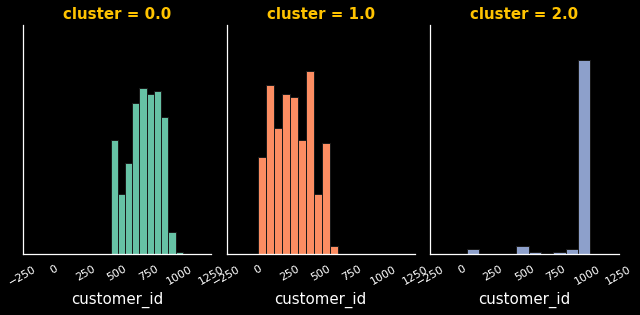

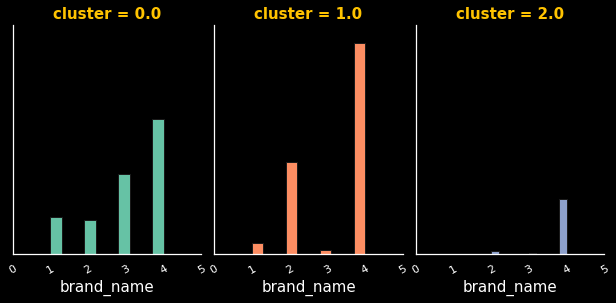

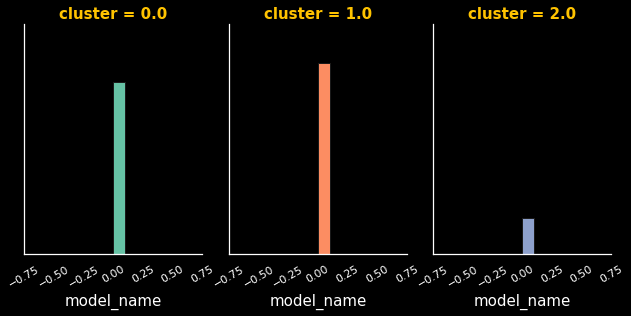

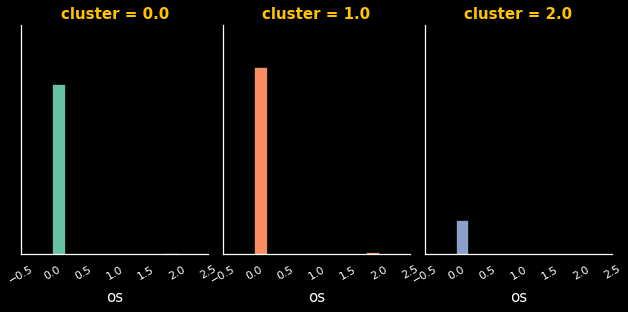

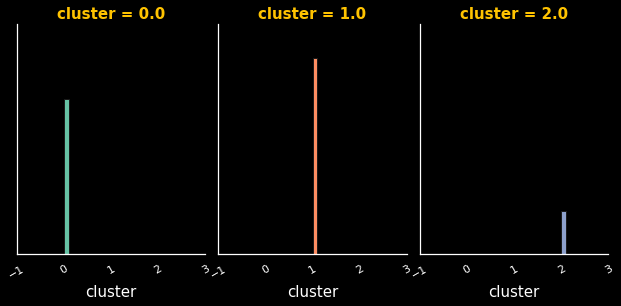

In [ ]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df_bc_cluster:
    g = sns.FacetGrid(df_mk_cluster, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5);

In [ ]:
df_bc_cluster['freq_count_bc'] = df_bc_cluster.groupby('cluster')['cluster'].transform('count')
df_bc_cluster['score_ranked_bc']=df_bc_cluster['freq_count_bc'].rank(ascending=0,method='dense')

In [ ]:
set(df_bc_cluster["score_ranked_bc"])

{nan,
 1.0,
 2.0,
 3.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan}

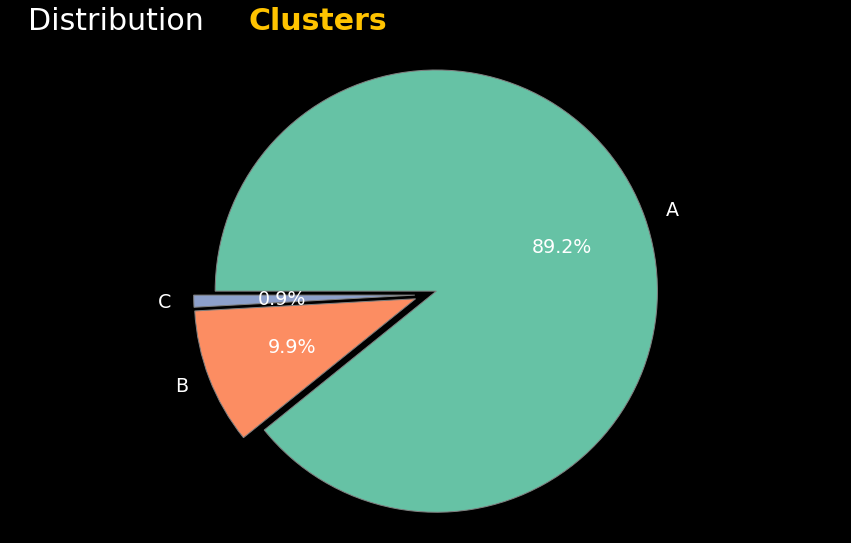

In [ ]:
clusters_count = df_bc_cluster['score_ranked_bc'].value_counts()                       
clusters_count = clusters_count.to_frame().reset_index()                      
clusters_count.columns = ['clusters', 'count']                               
clusters_count = clusters_count.sort_values('clusters', ascending = True)     

labels = [
        "A", 
        "B", 
        "C"
        ]

plt.figure(figsize=(15,9))
# mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:5]
plt.pie(clusters_count['count'], 
        explode=(0.05, 0.05, 0.05), 
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth':1}
        )

plt.axis('equal')
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-1.8, 1.2, "Distribution", size=30, color="white")
plt.show();

In [ ]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=3)
sc.fit(df_scaled)

labels = sc.fit_predict(df_scaled)
labels

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
set(labels)

{0, 1, 2}

In [ ]:
df_sc_cluster = pd.concat([df_data, pd.DataFrame({'cluster': labels})], axis = 1) 
df_sc_cluster.head()

,customer_id,brand_name,model_name,os,cluster
0,0.0,4.0,0.0,0.0,1.0
1,1.0,4.0,0.0,0.0,1.0
2,2.0,4.0,0.0,0.0,1.0
3,3.0,4.0,0.0,0.0,1.0
4,4.0,4.0,0.0,0.0,1.0


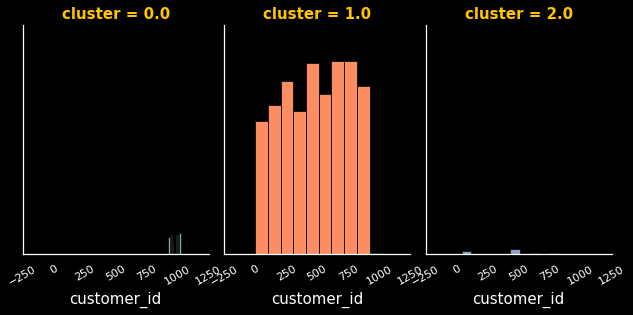

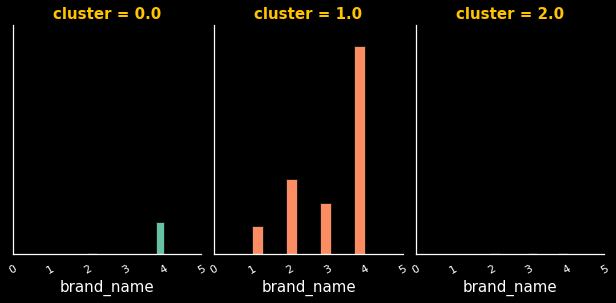

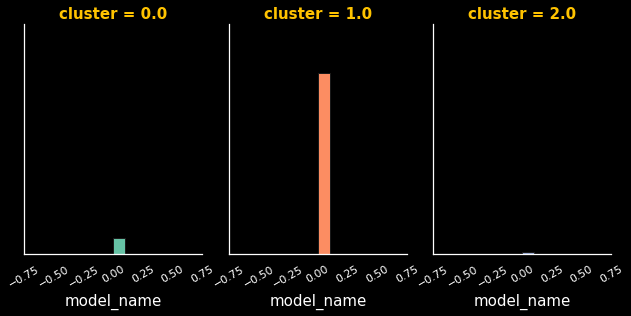

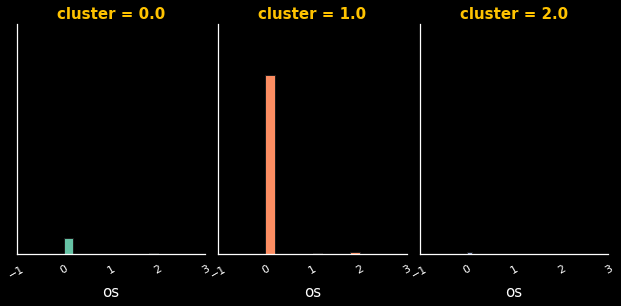

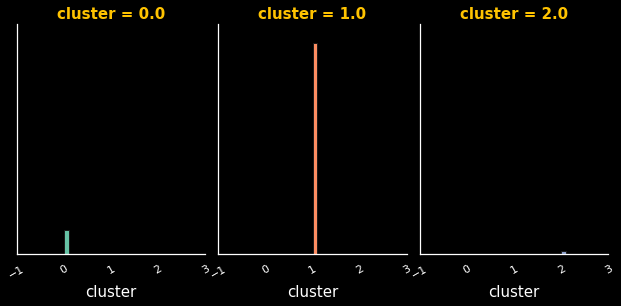

In [ ]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df_sc_cluster:
    g = sns.FacetGrid(df_sc_cluster, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5);

In [ ]:
df_sc_cluster['freq_count_sc'] = df_sc_cluster.groupby('cluster')['cluster'].transform('count')
df_sc_cluster['score_ranked_sc']=df_sc_cluster['freq_count_sc'].rank(ascending=0,method='dense')

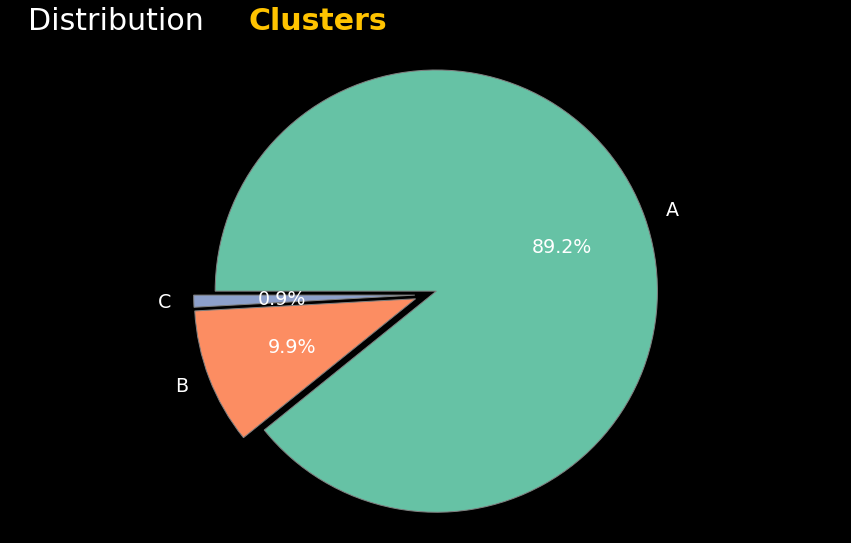

In [ ]:
clusters_count = df_sc_cluster['score_ranked_sc'].value_counts()                       
clusters_count = clusters_count.to_frame().reset_index()                      
clusters_count.columns = ['clusters', 'count']                               
clusters_count = clusters_count.sort_values('clusters', ascending = True)     

labels = [
        "A", 
        "B", 
        "C"
        
        ]

plt.figure(figsize=(15,9))
# mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:5]
plt.pie(clusters_count['count'], 
        explode=(0.05, 0.05, 0.05), 
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth':1}
        )

plt.axis('equal')
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-1.8, 1.2, "Distribution", size=30, color="white")
plt.show();

In [ ]:
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(df_scaled)
	kmeanModel.fit(df_scaled)

	distortions.append(sum(np.min(cdist(df_scaled, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / df_scaled.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(df_scaled, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / df_scaled.shape[0]
	mapping2[k] = kmeanModel.inertia_


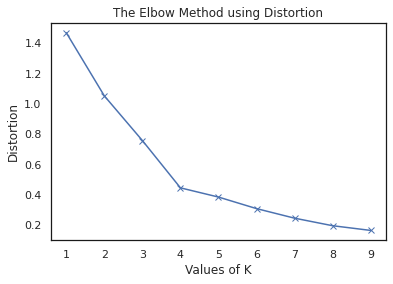

In [ ]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'axes.grid' : True})
plt.rc('axes',edgecolor='k')
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


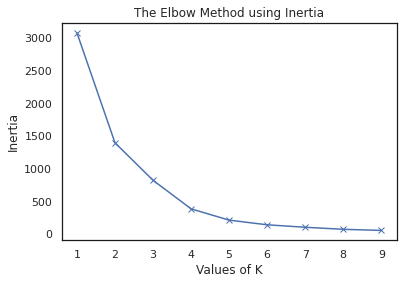

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


In [ ]:
unique_colors = set(dendrograma['color_list'])
print(len(unique_colors) -1)

2


In [ ]:
df_mk_cluster.head()

,customer_id,brand_name,model_name,os,cluster,freq_count_mk,score_ranked_mk
0,0.0,4.0,0.0,0.0,1.0,511.0,1.0
1,1.0,4.0,0.0,0.0,1.0,511.0,1.0
2,2.0,4.0,0.0,0.0,1.0,511.0,1.0
3,3.0,4.0,0.0,0.0,1.0,511.0,1.0
4,4.0,4.0,0.0,0.0,1.0,511.0,1.0


In [ ]:
df_mk_cluster['freq_count_mk'] = df_mk_cluster.groupby('cluster')['cluster'].transform('count')


In [ ]:
df_mk_cluster['score_ranked_mk']=df_mk_cluster['freq_count_mk'].rank(ascending=0,method='dense')

In [ ]:
df_mk_cluster

,customer_id,brand_name,model_name,os,cluster,freq_count_mk,score_ranked_mk
0,0.0,4.0,0.0,0.0,1.0,511.0,1.0
1,1.0,4.0,0.0,0.0,1.0,511.0,1.0
2,2.0,4.0,0.0,0.0,1.0,511.0,1.0
3,3.0,4.0,0.0,0.0,1.0,511.0,1.0
4,4.0,4.0,0.0,0.0,1.0,511.0,1.0
...,...,...,...,...,...,...,...
1218,1218.0,0.0,0.0,1.0,NaN,NaN,NaN
1219,1219.0,0.0,0.0,1.0,NaN,NaN,NaN
1220,1220.0,0.0,0.0,1.0,NaN,NaN,NaN
1221,1221.0,4.0,0.0,0.0,NaN,NaN,NaN


In [ ]:
df_bc_cluster['freq_count_bc'] = df_bc_cluster.groupby('cluster')['cluster'].transform('count')
df_bc_cluster['score_ranked_bc']=df_bc_cluster['freq_count_bc'].rank(ascending=0,method='dense')
df_bc_cluster

,customer_id,brand_name,model_name,os,cluster,freq_count_bc,score_ranked_bc
0,0.0,4.0,0.0,0.0,2.0,916.0,1.0
1,1.0,4.0,0.0,0.0,2.0,916.0,1.0
2,2.0,4.0,0.0,0.0,2.0,916.0,1.0
3,3.0,4.0,0.0,0.0,2.0,916.0,1.0
4,4.0,4.0,0.0,0.0,2.0,916.0,1.0
...,...,...,...,...,...,...,...
1218,1218.0,0.0,0.0,1.0,NaN,NaN,NaN
1219,1219.0,0.0,0.0,1.0,NaN,NaN,NaN
1220,1220.0,0.0,0.0,1.0,NaN,NaN,NaN
1221,1221.0,4.0,0.0,0.0,NaN,NaN,NaN


In [ ]:
df_ag_cluster['freq_count_ag'] = df_ag_cluster.groupby('cluster')['cluster'].transform('count')
df_ag_cluster['score_ranked_ag']=df_ag_cluster['freq_count_ag'].rank(ascending=0,method='dense')
df_ag_cluster

,customer_id,brand_name,model_name,os,cluster,freq_count_ag,score_ranked_ag
0,0.0,4.0,0.0,0.0,0.0,497.0,1.0
1,1.0,4.0,0.0,0.0,0.0,497.0,1.0
2,2.0,4.0,0.0,0.0,0.0,497.0,1.0
3,3.0,4.0,0.0,0.0,0.0,497.0,1.0
4,4.0,4.0,0.0,0.0,0.0,497.0,1.0
...,...,...,...,...,...,...,...
1218,1218.0,0.0,0.0,1.0,NaN,NaN,NaN
1219,1219.0,0.0,0.0,1.0,NaN,NaN,NaN
1220,1220.0,0.0,0.0,1.0,NaN,NaN,NaN
1221,1221.0,4.0,0.0,0.0,NaN,NaN,NaN


In [ ]:
df_sc_cluster['freq_count_sc'] = df_sc_cluster.groupby('cluster')['cluster'].transform('count')
df_sc_cluster['score_ranked_sc']=df_sc_cluster['freq_count_sc'].rank(ascending=0,method='dense')
df_sc_cluster

,customer_id,brand_name,model_name,os,cluster,freq_count_sc,score_ranked_sc
0,0.0,4.0,0.0,0.0,1.0,916.0,1.0
1,1.0,4.0,0.0,0.0,1.0,916.0,1.0
2,2.0,4.0,0.0,0.0,1.0,916.0,1.0
3,3.0,4.0,0.0,0.0,1.0,916.0,1.0
4,4.0,4.0,0.0,0.0,1.0,916.0,1.0
...,...,...,...,...,...,...,...
1218,1218.0,0.0,0.0,1.0,NaN,NaN,NaN
1219,1219.0,0.0,0.0,1.0,NaN,NaN,NaN
1220,1220.0,0.0,0.0,1.0,NaN,NaN,NaN
1221,1221.0,4.0,0.0,0.0,NaN,NaN,NaN


In [ ]:
df_ag_cluster=df_ag_cluster[['customer_id','score_ranked_ag']]
df_bc_cluster=df_bc_cluster[['customer_id','score_ranked_bc']]
df_sc_cluster=df_sc_cluster[['customer_id','score_ranked_sc']]
df_mk_cluster=df_mk_cluster[['customer_id','score_ranked_mk']]

In [ ]:
df_final=df_bc_cluster.merge(df_ag_cluster,on=['customer_id'],how='inner')
df_final=df_final.dropna()
df_final=df_final.merge(df_sc_cluster,on=['customer_id'],how='inner')
df_final=df_final.dropna()
df_final=df_final.merge(df_mk_cluster,on=['customer_id'],how='inner')
df_final=df_final.dropna()

In [ ]:
opts = ['score_ranked_mk','score_ranked_sc','score_ranked_bc','score_ranked_ag']
df_final['final_cluster']=df_final[opts].mode(axis=1)[0]


In [ ]:
df_final

,customer_id,score_ranked_bc,score_ranked_ag,score_ranked_sc,score_ranked_mk,final_cluster
0,0.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0
2,2.0,1.0,1.0,1.0,1.0,1.0
3,3.0,1.0,1.0,1.0,1.0,1.0
4,4.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...
861,1021.0,2.0,3.0,2.0,3.0,2.0
862,1022.0,2.0,3.0,2.0,3.0,2.0
863,1023.0,2.0,3.0,2.0,3.0,2.0
864,1024.0,2.0,3.0,2.0,3.0,2.0


In [ ]:
d1=df_final[df_final['score_ranked_mk']==df_final['score_ranked_bc']]

In [ ]:
len(df_final)

866

In [ ]:
n1=list(df_final[~df_final.customer_id.isin(list(d1['customer_id']))]['customer_id'])

In [ ]:
len(n1)

444

In [ ]:
d2=df_final[df_final['score_ranked_sc']==df_final['score_ranked_ag']]

In [ ]:
n2=list(df_final[~df_final.customer_id.isin(list(d2['customer_id']))]['customer_id'])

In [ ]:
len(n2)

458

In [ ]:
n1=set(n1+n2)
len(n1)

458

In [ ]:
omit_df=pd.DataFrame(n1)

In [ ]:
omit_df.to_csv('omit.csv')

In [ ]:
d1=d1.merge(d2, on=['customer_id',	'score_ranked_mk',	'score_ranked_sc',	'score_ranked_ag',	'score_ranked_bc',	'final_cluster'])

In [ ]:
d1=d1[d1['score_ranked_mk']==d1['score_ranked_sc']]

In [ ]:
len(d1)

408

In [ ]:
len(d1)/len(df_final)*100.0

47.11316397228637

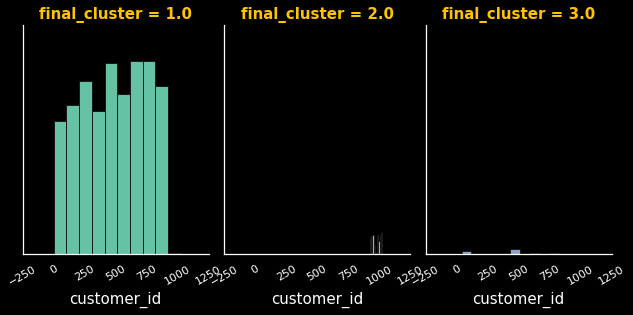

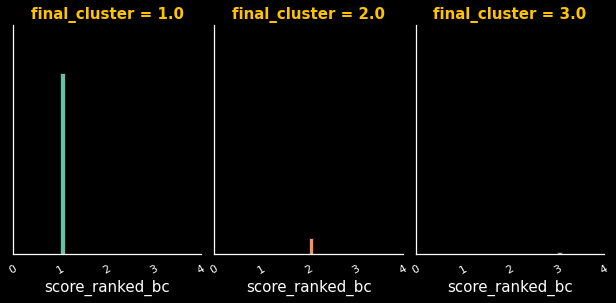

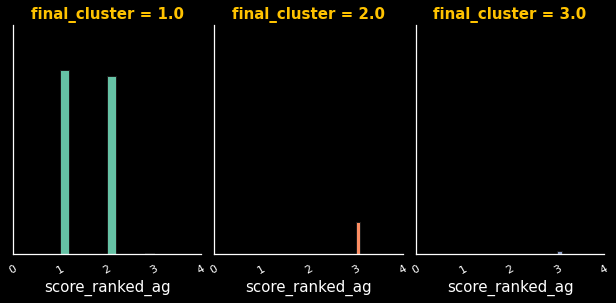

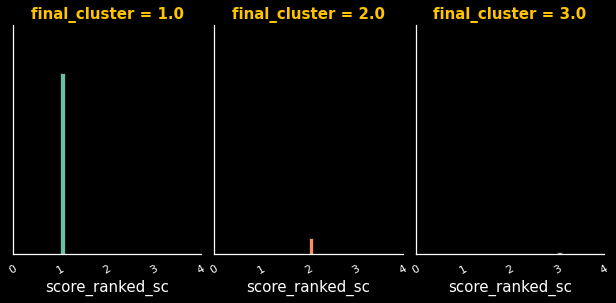

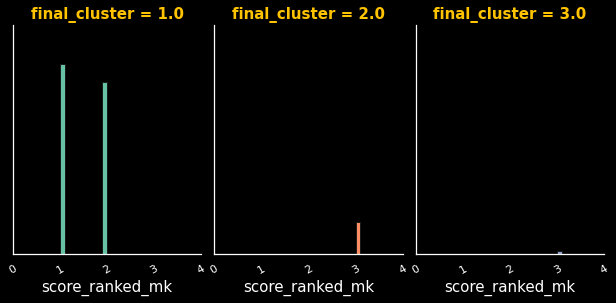

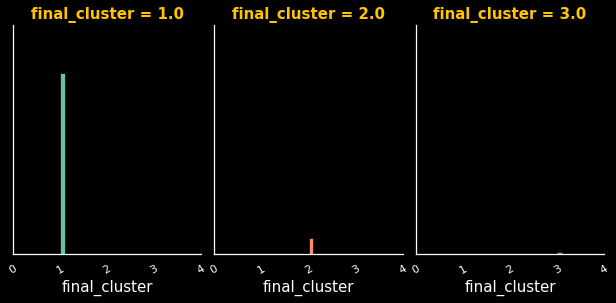

In [ ]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df_final:
    g = sns.FacetGrid(df_final, col = "final_cluster", hue = "final_cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5);

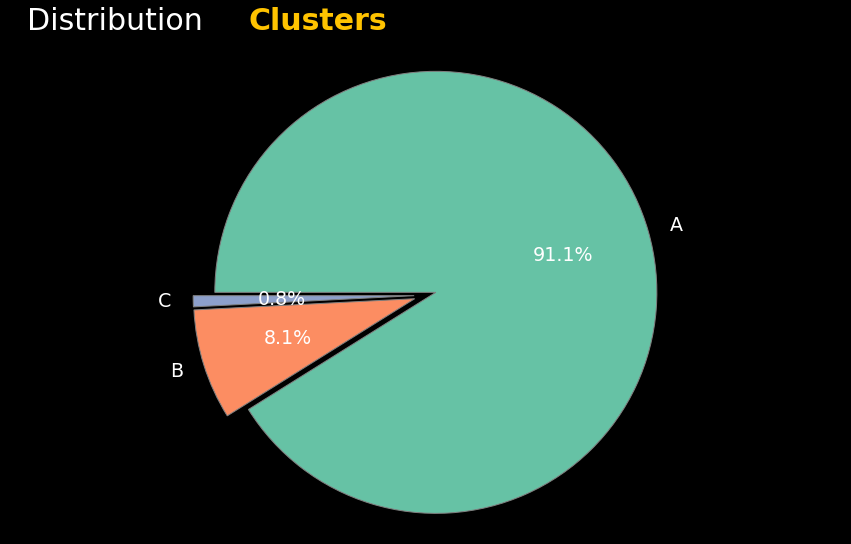

In [ ]:
clusters_count = df_final['final_cluster'].value_counts()                       
clusters_count = clusters_count.to_frame().reset_index()                      
clusters_count.columns = ['clusters', 'count']                               
clusters_count = clusters_count.sort_values('clusters', ascending = True)     

labels = [
        "A", 
        "B" ,
        "C"
        
        ]

plt.figure(figsize=(15,9))
# mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:5]
plt.pie(clusters_count['count'], 
        explode=(0.05,0.05,0.05), 
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth':1}
        )

plt.axis('equal')
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-1.8, 1.2, "Distribution", size=30, color="white")
plt.show();